In [253]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score

warnings.filterwarnings("ignore")
diabetes = load_diabetes()
X,y = diabetes.data,diabetes.target

X.shape

(442, 10)

In [254]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [255]:
diabetes.target[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

## Linear Regression

In [256]:
df = pd.DataFrame(X,columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])
df["diabetes"] = y
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Scaler

In [257]:
X = df.drop("diabetes",axis=1)
cols = X.columns
scaler = StandardScaler()
for col in cols:
    df[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])

In [258]:
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,diabetes
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568,135.0


### Model, Predict & Score

In [268]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1, test_size=0.2)
linear_model = LinearRegression().fit(X_train,y_train)

y_pred_linear =  linearmodel.predict(X_test)

print(f'the intercept is:{linear_model.intercept_}')
print(f'the slope is:{linear_model.coef_}')

r2_score(y_test,y_pred_linear) 

the intercept is:0.49988314836051484
the slope is:[-0.09684532 -1.94123533  2.45105266  1.62103432 -3.19094707  2.42461893
 -1.21149489 -0.20698768  3.93210709  0.0734237 ]


0.3484647857075056

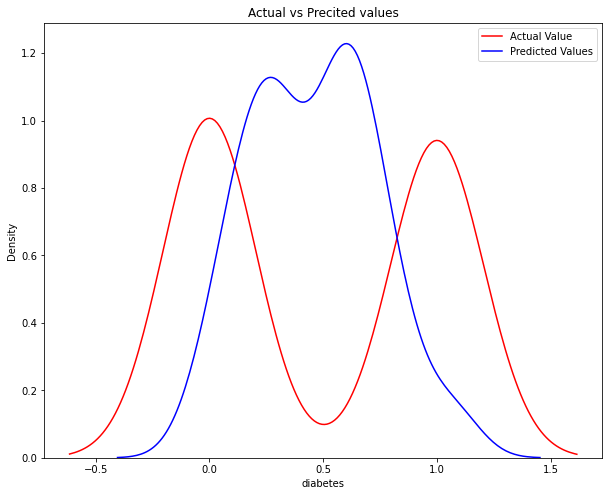

In [269]:
plt.figure(figsize = (10,8))

ax = sns.kdeplot(y_test, color = "r", label = "Actual Value")
sns.kdeplot(y_pred_linear, color = "b", label = "Predicted Values",
           ax = ax)

plt.title('Actual vs Precited values')

plt.legend()

plt.show()

## LogisticRegression
A blood sugar level less than 140 mg/dL (7.8 mmol/L) is normal.

In [260]:
df["diabetes"] = df["diabetes"].apply(lambda x : 1 if x>=140 else 0 )
y = df["diabetes"]
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,diabetes
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989,1
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479,0
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154,1
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823,1
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568,0


### Model, Predict & Score

In [270]:
X_train,X_test,y_train,y_test = train_test_split(X,df["diabetes"], random_state = 1,test_size=0.2)
LogisticModel = LogisticRegression().fit(X_train,y_train)
y_pred_logistic = LogisticModel.predict(X_test)

print(f'the intercept is:{LogisticModel.classes_}')
print(f'the slope is:{LogisticModel.coef_}')

LogisticModel.score(X_test, y_test) #test set


the intercept is:[0 1]
the slope is:[[ 0.60880323 -0.53177235  2.71014326  1.8246915   0.4867677   0.28259547
  -1.88238845  1.63516316  2.57787728  1.35036424]]


0.7528089887640449

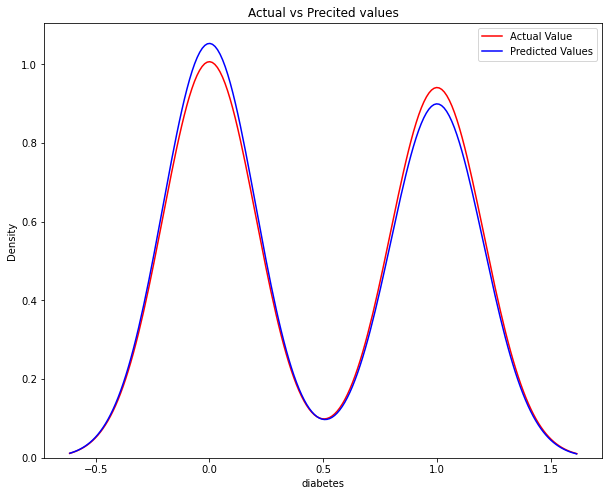

In [271]:
plt.figure(figsize = (10,8))

ax = sns.kdeplot(y_test, color = "r", label = "Actual Value")
sns.kdeplot(y_pred_logistic, color = "b", label = "Predicted Values",
           ax = ax)

plt.title('Actual vs Precited values')

plt.legend()

plt.show()